In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap  # <-- add this line


In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("mental_health_dataset.csv")

# Basic info
print("---- df.info() ----")
df.info()
print("\n---- df.head() ----")
print(df.head())
print("\n---- df.describe() ----")
print(df.describe(include='all').transpose())

---- df.info() ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10300 non-null  int64  
 1   gender                  10300 non-null  object 
 2   employment_status       10300 non-null  object 
 3   work_environment        10300 non-null  object 
 4   mental_health_history   10300 non-null  object 
 5   seeks_treatment         10300 non-null  object 
 6   sleep_hours             10300 non-null  float64
 7   physical_activity_days  10300 non-null  int64  
 8   depression_score        10300 non-null  int64  
 9   anxiety_score           10300 non-null  int64  
 10  social_support_score    10300 non-null  int64  
 11  productivity_score      10300 non-null  float64
 12  mental_health_risk      10300 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB

---- df.head(

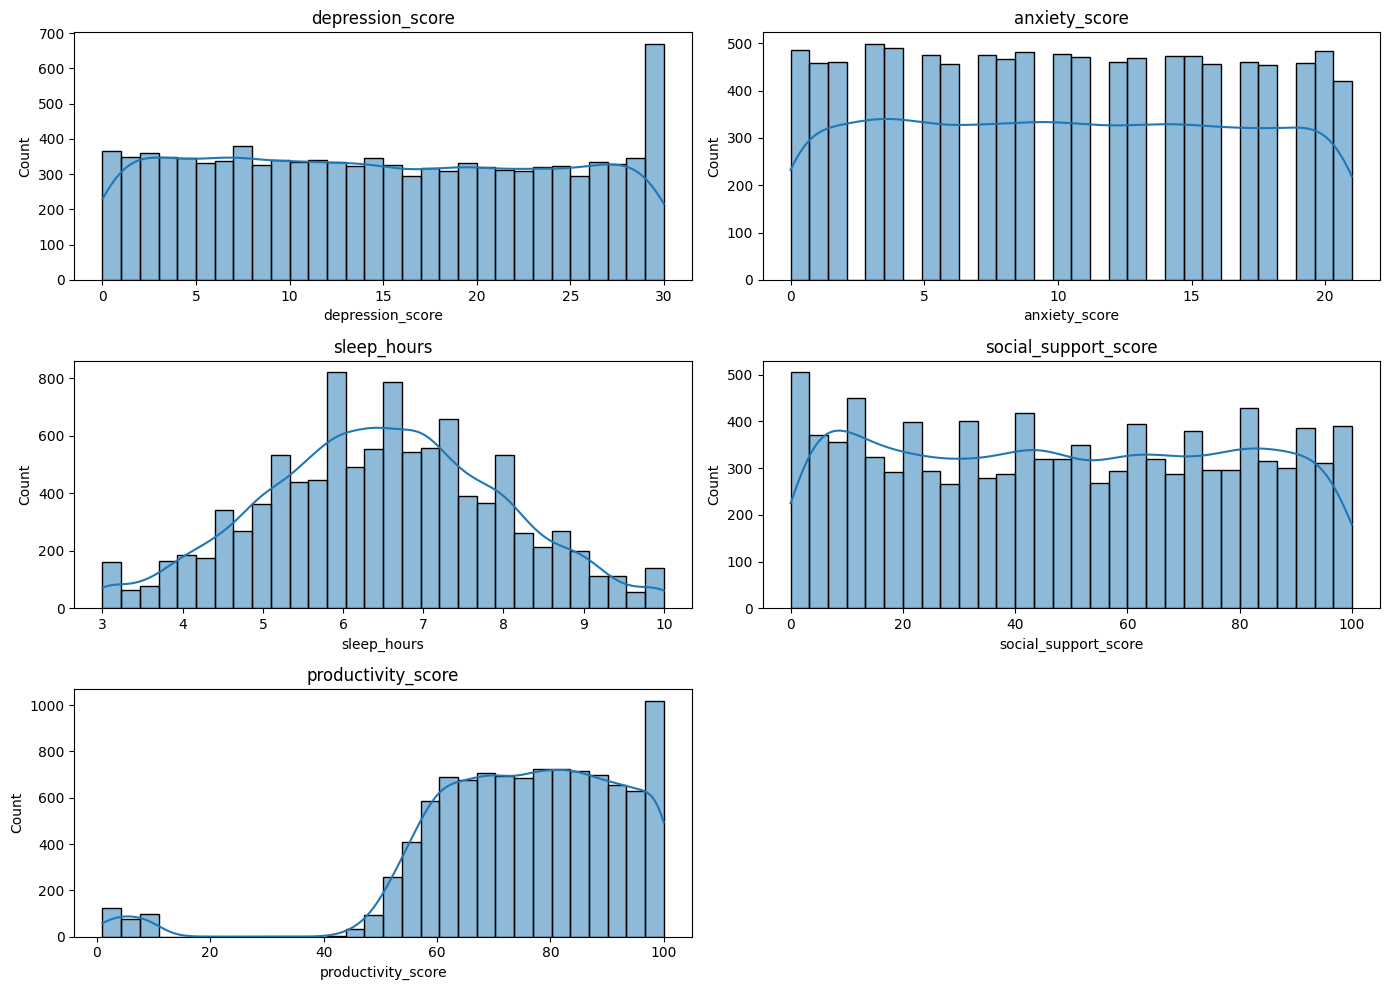

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['depression_score','anxiety_score','sleep_hours','social_support_score','productivity_score']
plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols,1):
    plt.subplot(3,2,i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11200\2716498054.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11200\2716498054.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11200\2716498054.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11200\2716498054.py:8: FutureWarning: 

Passing `palette` without 

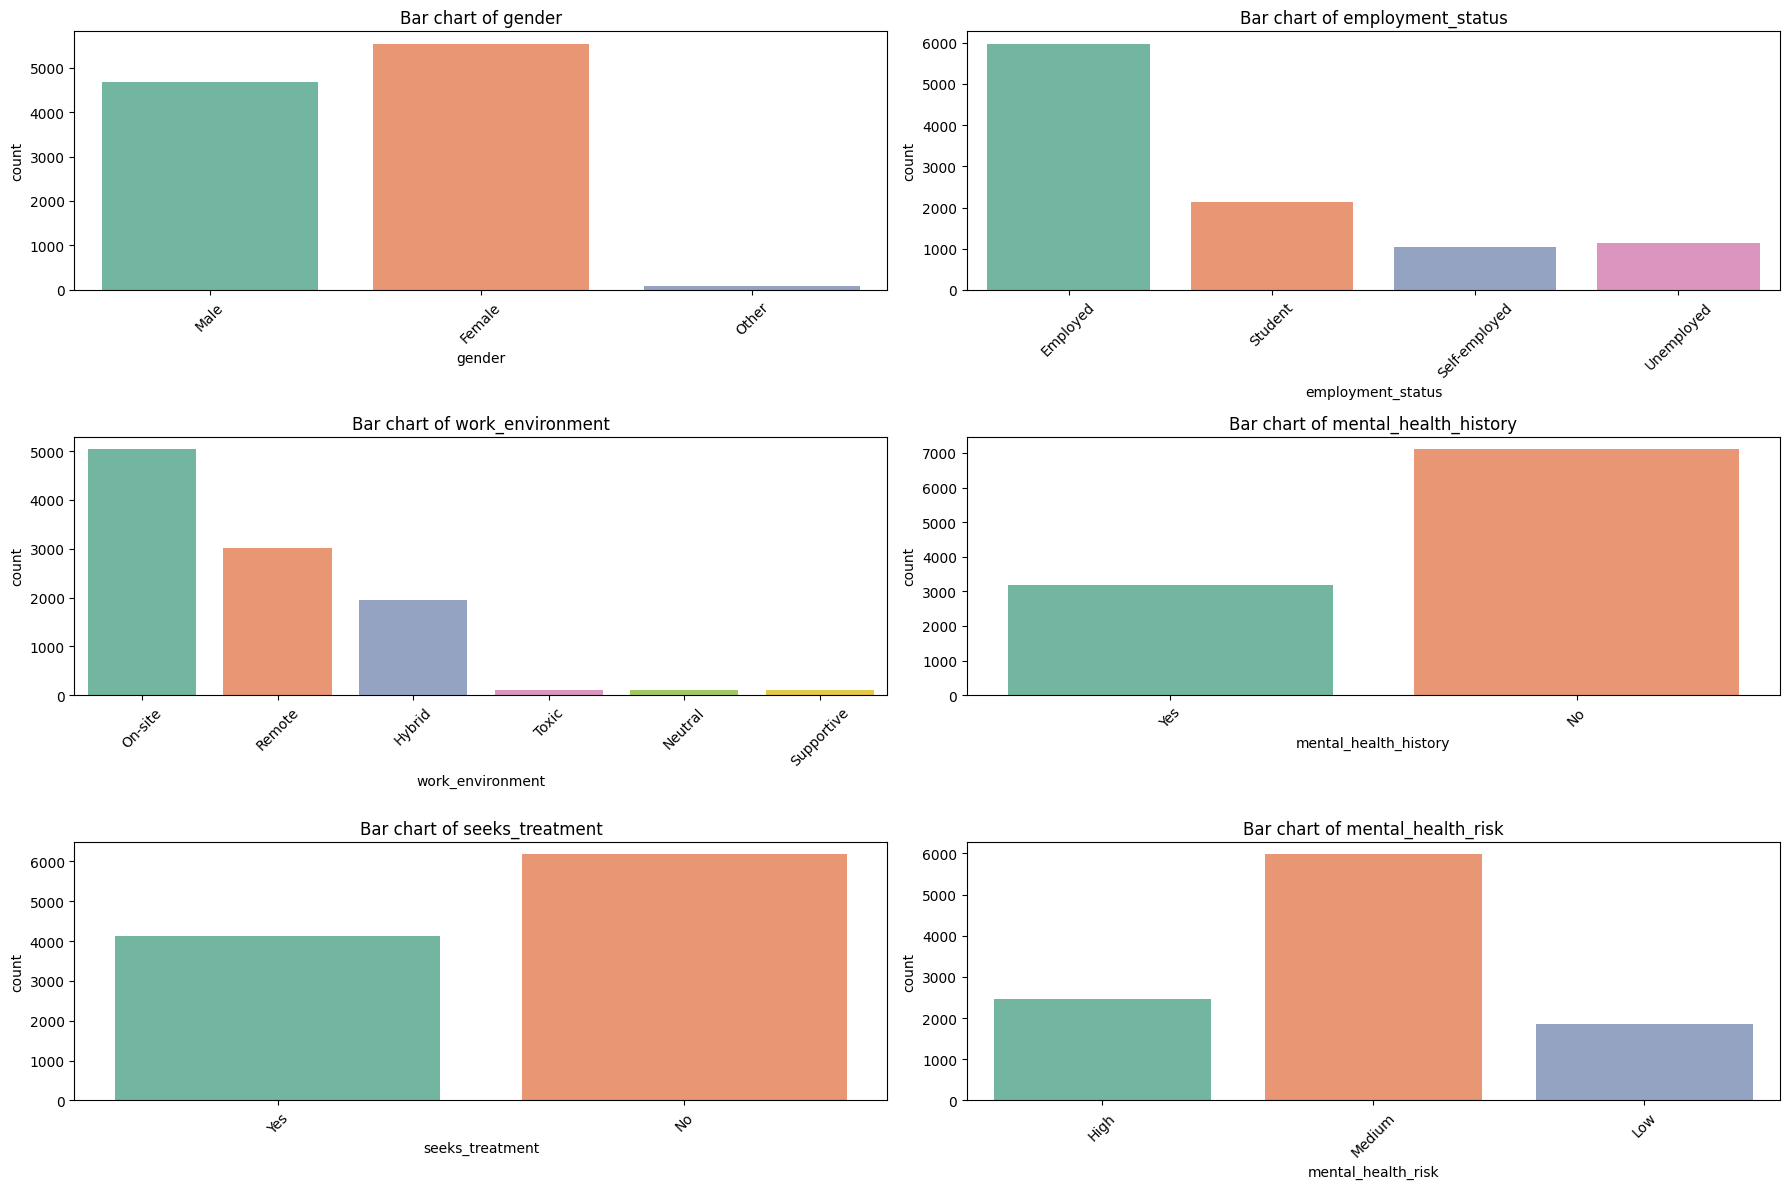

In [4]:
categorical_cols = ['gender', 'employment_status', 'work_environment', 
                    'mental_health_history', 'seeks_treatment', 'mental_health_risk']

# Plot bar charts for all categorical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Bar chart of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


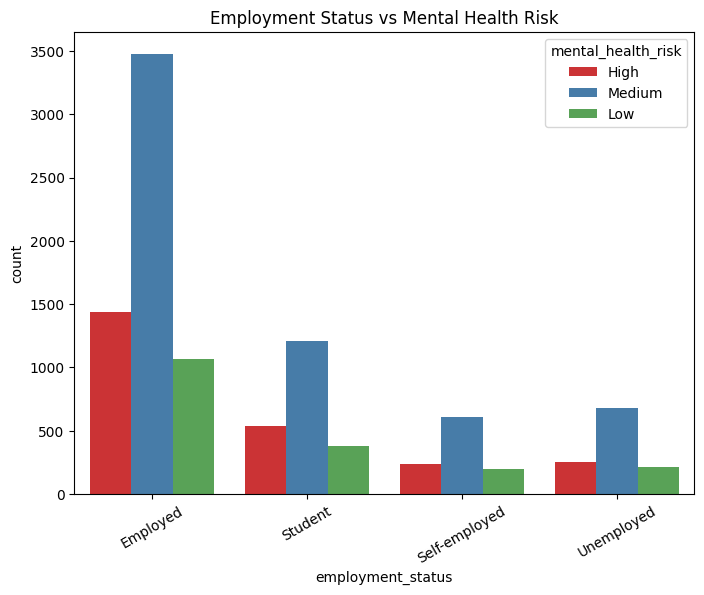

In [5]:
# Example: Categorical vs Categorical -> Employment Status vs Mental Health Risk
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='employment_status', hue='mental_health_risk', palette='Set1')
plt.title("Employment Status vs Mental Health Risk")
plt.xticks(rotation=30)
plt.show()


In [6]:
from scipy.stats import chi2_contingency
cont = pd.crosstab(df['employment_status'], df['mental_health_risk'])
chi2, p, dof, ex = chi2_contingency(cont)
print("Chi2 p-value:", p)

Chi2 p-value: 0.4305532752704052


C:\Users\User\AppData\Local\Temp\ipykernel_11200\803794038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health_risk', y=col, data=df, palette='Set2', order=sorted(df['mental_health_risk'].unique()))
C:\Users\User\AppData\Local\Temp\ipykernel_11200\803794038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health_risk', y=col, data=df, palette='Set2', order=sorted(df['mental_health_risk'].unique()))
C:\Users\User\AppData\Local\Temp\ipykernel_11200\803794038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='m

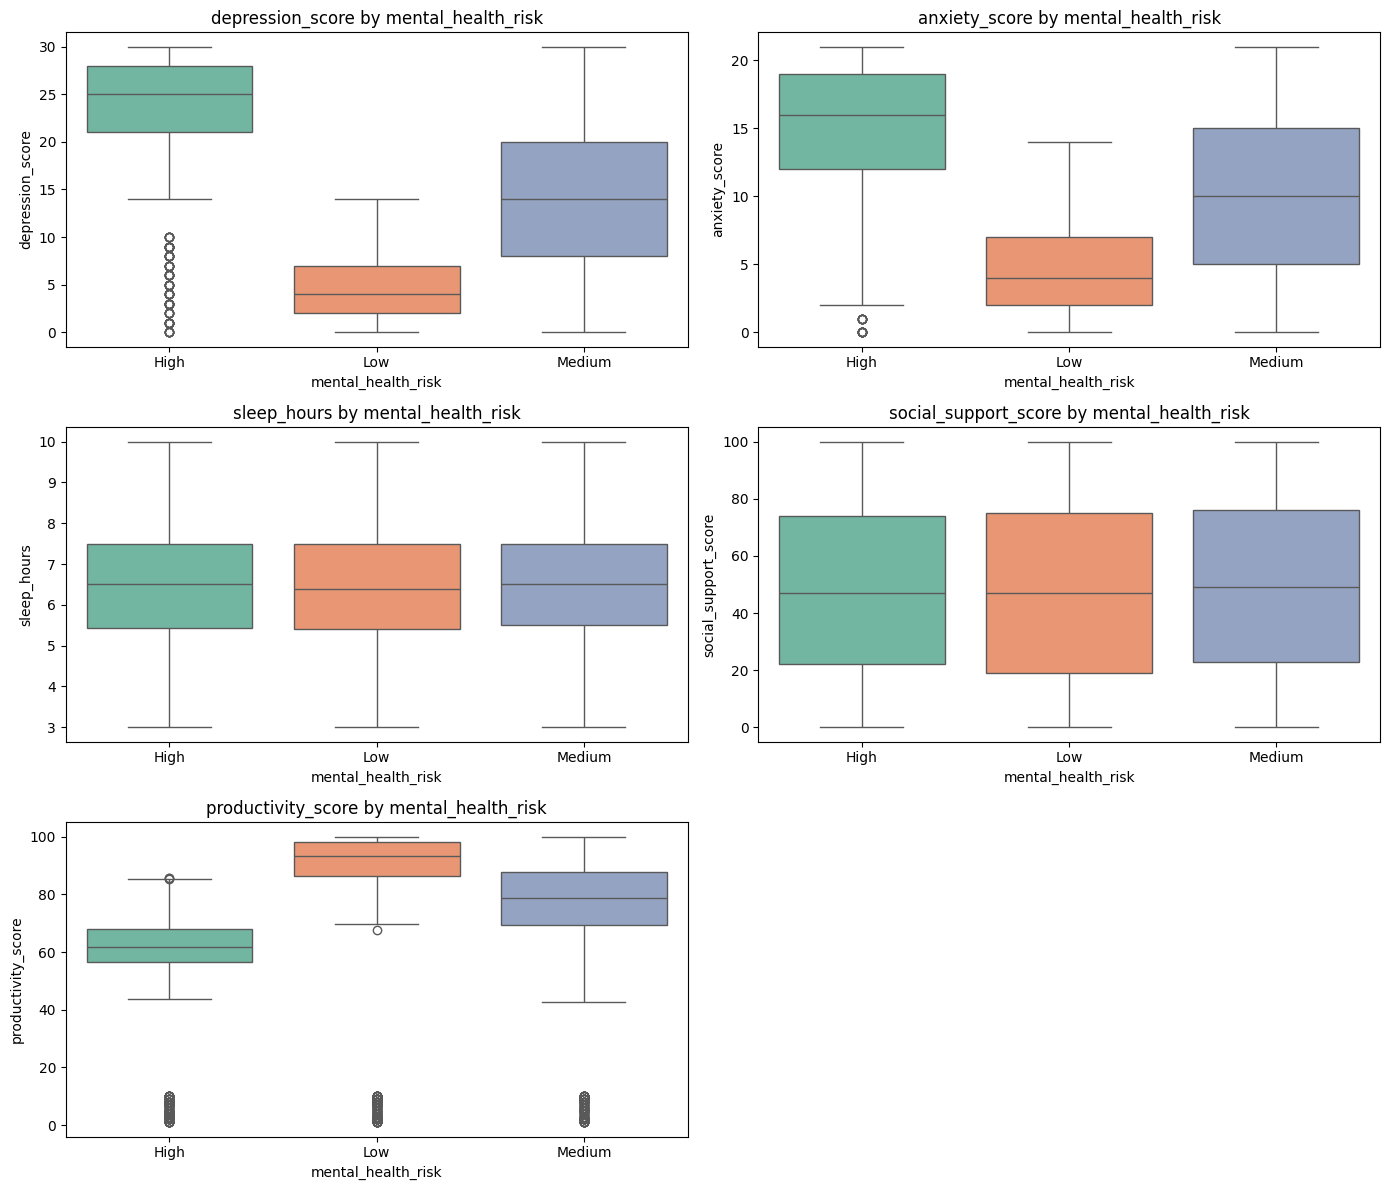

In [7]:
num_cols = ['depression_score','anxiety_score','sleep_hours','social_support_score','productivity_score']
plt.figure(figsize=(14,12))
for i, col in enumerate(num_cols,1):
    plt.subplot(3,2,i)
    sns.boxplot(x='mental_health_risk', y=col, data=df, palette='Set2', order=sorted(df['mental_health_risk'].unique()))
    plt.title(f"{col} by mental_health_risk")
plt.tight_layout()
plt.show()

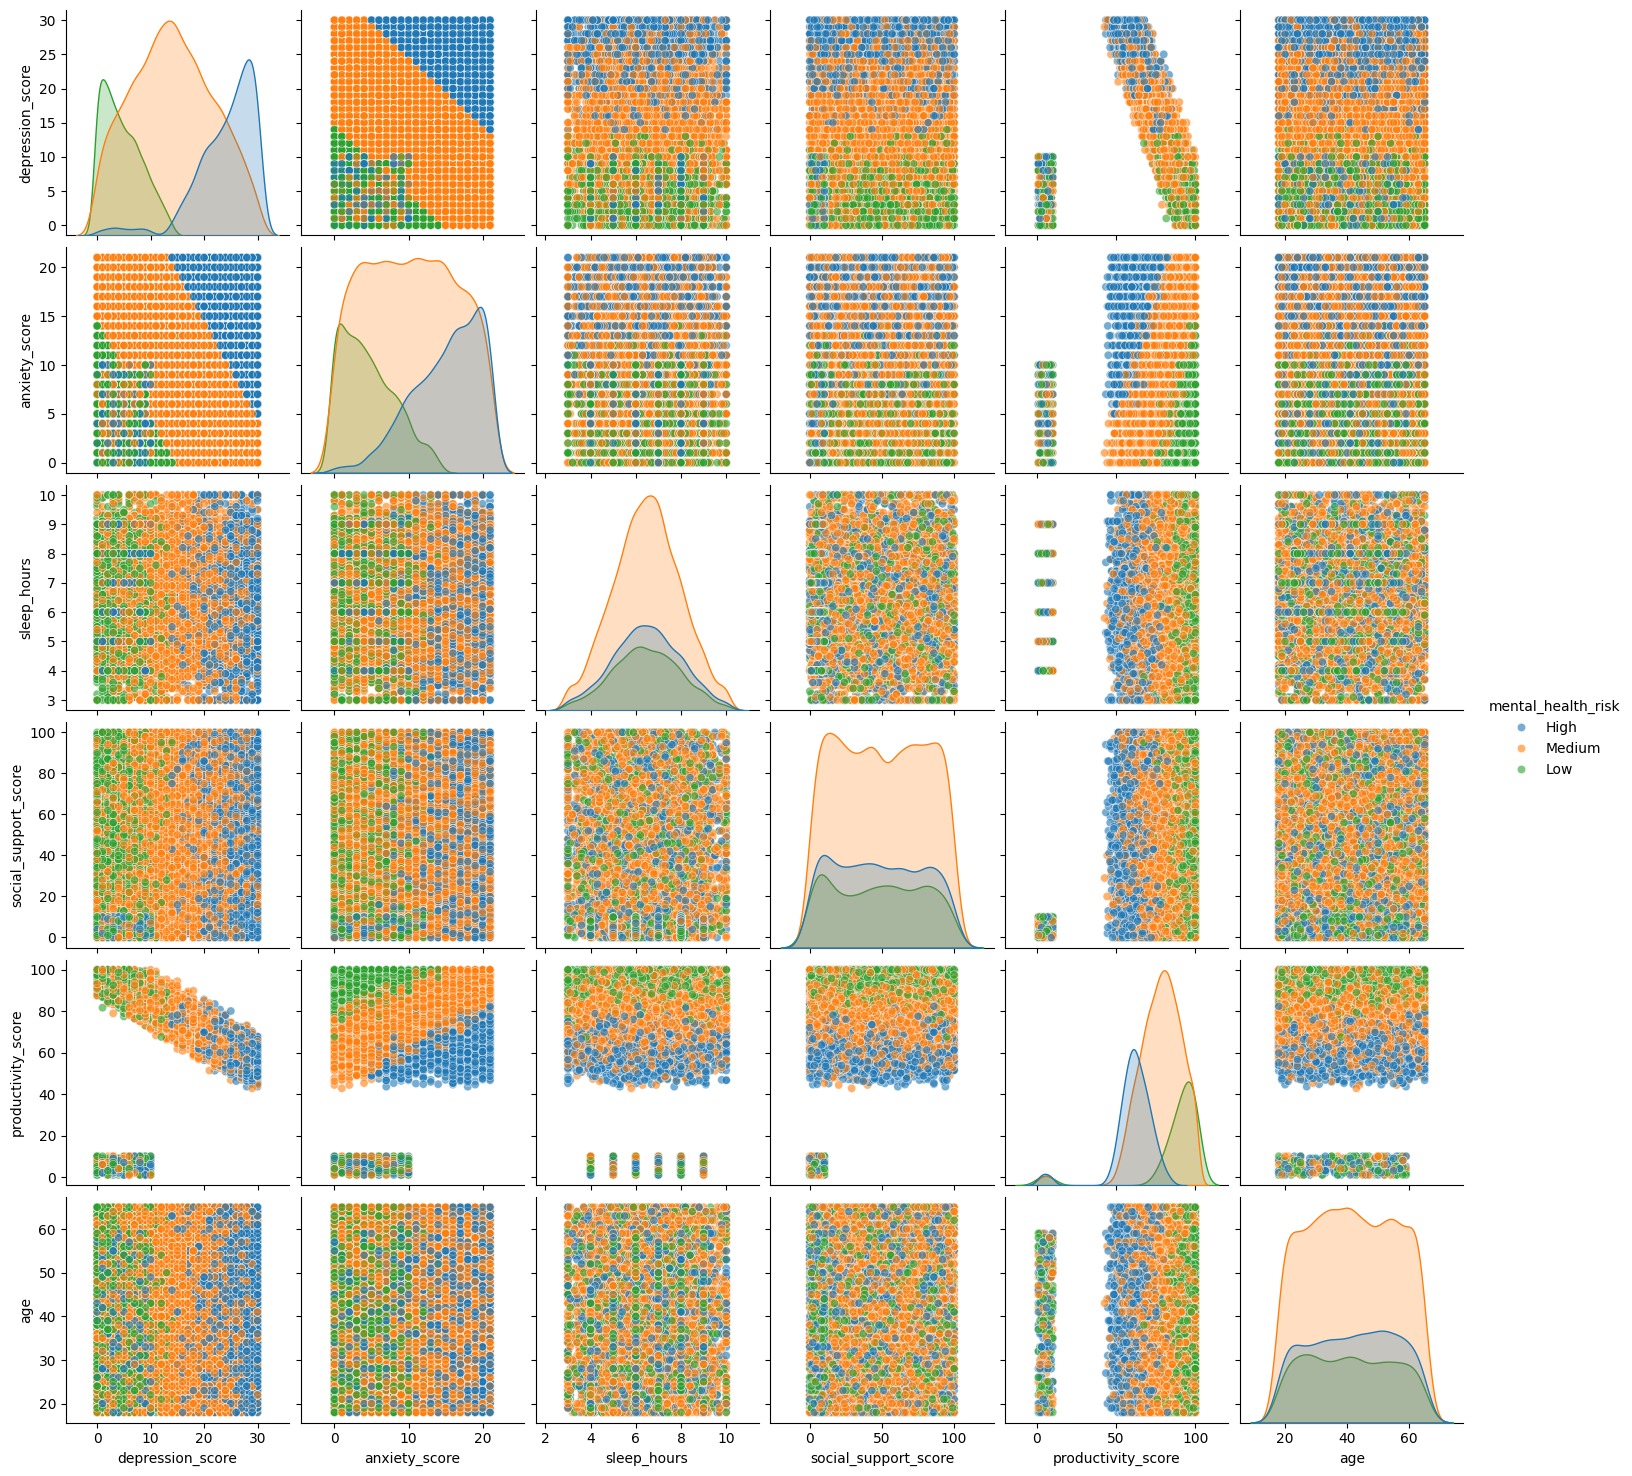

In [8]:
pair_cols = ['depression_score','anxiety_score','sleep_hours','social_support_score','productivity_score','age']
sns.pairplot(df[pair_cols + ['mental_health_risk']], hue='mental_health_risk', diag_kind='kde', plot_kws={'alpha':0.6})
plt.show()

Series([], dtype: int64)


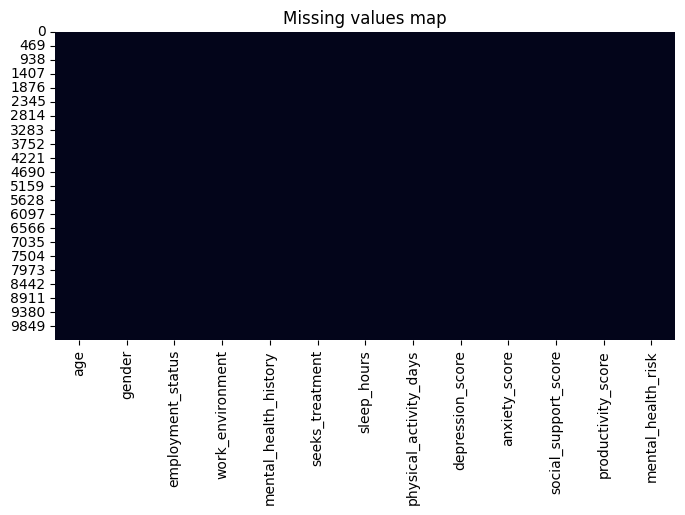

In [9]:
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing>0])
# Visualize missingness
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values map")
plt.show()

In [10]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_features = df.select_dtypes(include=[np.number]).columns.tolist()
cat_features = df.select_dtypes(include=['object','category','bool']).columns.tolist()
# Exclude target
if 'mental_health_risk' in num_features: num_features.remove('mental_health_risk')
if 'mental_health_risk' in cat_features: cat_features.remove('mental_health_risk')

df[num_features] = num_imputer.fit_transform(df[num_features])
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['mental_health_risk'])
y = df['mental_health_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Train class counts:\n", y_train.value_counts())
print("Test class counts:\n", y_test.value_counts())

Train class counts:
 mental_health_risk
Medium    4783
High      1976
Low       1481
Name: count, dtype: int64
Test class counts:
 mental_health_risk
Medium    1196
High       494
Low        370
Name: count, dtype: int64


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

cat_features = X.select_dtypes(include=['object','category','bool']).columns.tolist()
num_features = X.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
])


In [13]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight=None)

pipeline = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', clf)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'sleep_hours',
                                                   'physical_activity_days',
                                                   'depression_score',
                                                   'anxiety_score',
                                                   'social_support_score',
                                                   'productivity_score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'employment_status',
                                                   'work_environment',
                                                   'mental_health_history',
                                                   'seeks_treatment'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [14]:
from imblearn.over_sampling import SMOTENC
# Identify indices of categorical encoded columns if using get_dummies; or use SMOTENC with original indices of categorical features before encoding

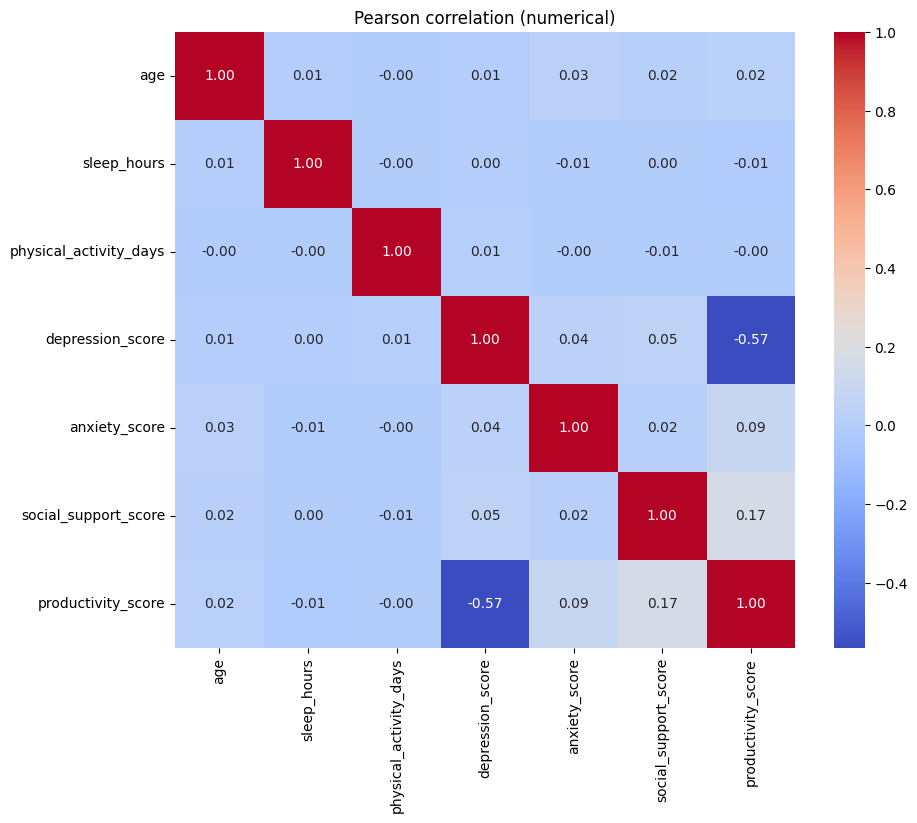

Top features by mutual information:
 depression_score                   0.344054
productivity_score                 0.300876
anxiety_score                      0.178307
physical_activity_days             0.007862
work_environment_Supportive        0.006711
gender_Other                       0.003606
mental_health_history_Yes          0.003338
work_environment_Remote            0.002416
work_environment_Toxic             0.001851
age                                0.001736
social_support_score               0.001249
sleep_hours                        0.000564
gender_Male                        0.000265
employment_status_Student          0.000000
employment_status_Self-employed    0.000000
work_environment_On-site           0.000000
work_environment_Neutral           0.000000
employment_status_Unemployed       0.000000
seeks_treatment_Yes                0.000000
dtype: float64


In [15]:
# Numeric correlation
import seaborn as sns
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson correlation (numerical)")
plt.show()

# Mutual information (numerical+categorical vs target)
from sklearn.feature_selection import mutual_info_classif

X_enc = pd.get_dummies(X, drop_first=True)  # quick encoding
mi = mutual_info_classif(X_enc.fillna(0), y, random_state=42)
mi_series = pd.Series(mi, index=X_enc.columns).sort_values(ascending=False)
print("Top features by mutual information:\n", mi_series.head(20))

In [16]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))
    return df[mask]

df_clean = remove_outliers_iqr(df, 'depression_score')  # repeat for other numeric cols or use multivariate method

In [17]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
num_only = df.select_dtypes(include=[np.number]).fillna(0)
outliers = iso.fit_predict(num_only)  # -1 are outliers
df_inliers = df[outliers==1]

In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use pipeline defined earlier with SMOTE + RandomForest
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9504854368932039
              precision    recall  f1-score   support

        High       0.95      0.93      0.94       494
         Low       0.91      0.95      0.93       370
      Medium       0.97      0.96      0.96      1196

    accuracy                           0.95      2060
   macro avg       0.94      0.94      0.94      2060
weighted avg       0.95      0.95      0.95      2060

Confusion Matrix:
 [[ 457   13   24]
 [   4  350   16]
 [  22   23 1151]]


In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'clf__n_estimators': [100,200,400],
    'clf__max_depth': [None,10,20,30],
    'clf__min_samples_split':[2,5,10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rs = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=12, scoring='balanced_accuracy', n_jobs=-1, cv=cv, random_state=42)
rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
best_model = rs.best_estimator_
y_pred = best_model.predict(X_test)
print("Test balanced accuracy:", rs.best_score_)
print(classification_report(y_test, y_pred))

Best params: {'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__max_depth': 30}
Test balanced accuracy: 0.9344743543714747
              precision    recall  f1-score   support

        High       0.93      0.93      0.93       494
         Low       0.91      0.94      0.93       370
      Medium       0.97      0.96      0.96      1196

    accuracy                           0.95      2060
   macro avg       0.94      0.94      0.94      2060
weighted avg       0.95      0.95      0.95      2060



In [20]:
# Imports
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score,
                             classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Determine sklearn version and safe OneHotEncoder kwargs
ohe_kwargs = {'handle_unknown':'ignore'}
skv = tuple(map(int, sklearn.__version__.split('.')[:2]))
if skv >= (1,2):
    ohe_kwargs['sparse_output'] = False
else:
    ohe_kwargs['sparse'] = False

In [21]:
df = pd.read_csv("mental_health_dataset.csv")  # or your path

# target
target = 'mental_health_risk'
X = df.drop(columns=[target])
y = df[target]

# basic split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [22]:
# identify columns
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=['object','category','bool']).columns.tolist()

# remove target if present accidentally
if target in num_features: num_features.remove(target)
if target in cat_features: cat_features.remove(target)

# numeric and categorical pipelines
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(**ohe_kwargs))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder='drop')

In [23]:
import xgboost
import lightgbm

print("XGBoost version:", xgboost.__version__)
print("LightGBM version:", lightgbm.__version__)


XGBoost version: 3.0.4
LightGBM version: 4.6.0


In [24]:
print(df.columns)


Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'sleep_hours',
       'physical_activity_days', 'depression_score', 'anxiety_score',
       'social_support_score', 'productivity_score', 'mental_health_risk'],
      dtype='object')


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

models = {
    'LogisticRegression': LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVC': SVC(probability=True, class_weight='balanced', random_state=42)
}


In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np


In [50]:
print(le.classes_)  # ['High', 'Low', 'Medium']


['High' 'Low' 'Medium']


In [51]:
pred_numeric = best_pipe.predict(new_input)
pred_label = le.inverse_transform(pred_numeric)[0]

proba = best_pipe.predict_proba(new_input)[0]
for cls, p in zip(le.classes_, proba):
    print(f"{cls}: {p:.4f}")


High: 0.0029
Low: 0.0011
Medium: 0.9960


In [30]:
# 5️⃣ Encode target labels to numeric
le = LabelEncoder()
y_enc = le.fit_transform(y)  # High/Medium/Low → 0,1,2

# 6️⃣ Train-test split
X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# 7️⃣ Preprocessing
cat_features = X.select_dtypes(include=['object','category','bool']).columns.tolist()
num_features = X.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
])

In [31]:
# 8️⃣ Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVC': SVC(probability=True, class_weight='balanced', random_state=42)
}

# 9️⃣ Cross-validation setup
scoring = ['accuracy', 'balanced_accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

# 1️⃣0️⃣ Loop over models
for name, clf in models.items():
    pipe = ImbPipeline(steps=[
        ('preproc', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf', clf)
    ])
    print("Cross-validating:", name)
    
    cv_res = cross_validate(
        pipe, X_train, y_train_enc,
        cv=cv, scoring=scoring, n_jobs=-1, return_estimator=False
    )
    
    # Aggregate metrics
    summary = {metric: np.mean(cv_res[f'test_{metric}']) for metric in scoring}
    summary['std_accuracy'] = np.std(cv_res['test_accuracy'])
    results[name] = summary

# 1️⃣1️⃣ Show results DataFrame
res_df = pd.DataFrame(results).T.sort_values('f1_macro', ascending=False)
print("\n📊 Model Performance (5-fold CV):\n")
print(res_df)

Cross-validating: LogisticRegression
Cross-validating: RandomForest
Cross-validating: XGBoost
Cross-validating: LightGBM
Cross-validating: SVC

📊 Model Performance (5-fold CV):

                    accuracy  balanced_accuracy  f1_macro  precision_macro  \
XGBoost             0.978762           0.972792  0.971912         0.971252   
LightGBM            0.978398           0.972486  0.970832         0.969442   
LogisticRegression  0.948665           0.958138  0.940985         0.926943   
SVC                 0.948058           0.950732  0.937969         0.927242   
RandomForest        0.944053           0.934246  0.933704         0.933608   

                    recall_macro  std_accuracy  
XGBoost                 0.972792      0.002948  
LightGBM                0.972486      0.003981  
LogisticRegression      0.958138      0.006807  
SVC                     0.950732      0.004072  
RandomForest            0.934246      0.005926  



🏆 Best Model: XGBoost with f1_macro = 0.9719


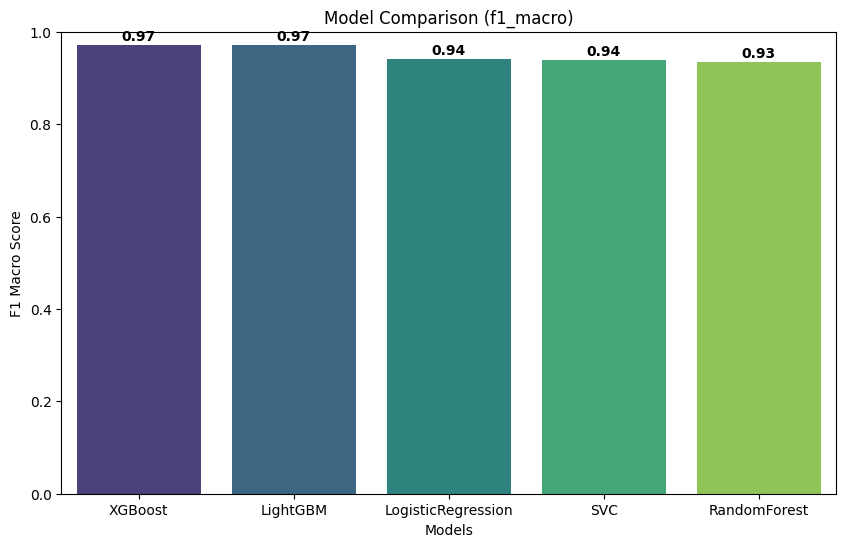

In [32]:
# 1️⃣2️⃣ Best model based on f1_macro
best_model_name = res_df['f1_macro'].idxmax()
best_model_score = res_df.loc[best_model_name, 'f1_macro']
print(f"\n🏆 Best Model: {best_model_name} with f1_macro = {best_model_score:.4f}")

# 1️⃣3️⃣ Colorful bar plot for all models
plt.figure(figsize=(10,6))
sns.barplot(x=res_df.index, y='f1_macro', data=res_df, palette="viridis")
plt.title("Model Comparison (f1_macro)")
plt.ylabel("F1 Macro Score")
plt.xlabel("Models")
plt.ylim(0,1)
for i, v in enumerate(res_df['f1_macro']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [33]:
# 🔹 Define class names for confusion matrix
class_names = le.classes_


In [34]:
# 🔹 Select best model based on f1_macro
best_model_name = res_df['f1_macro'].idxmax()
best_model_score = res_df.loc[best_model_name, 'f1_macro']
print(f"\n🏆 Best Model: {best_model_name} with f1_macro = {best_model_score:.4f}")


🏆 Best Model: XGBoost with f1_macro = 0.9719


In [35]:
# 🔹 Train best model on full training set
best_clf = models[best_model_name]
best_pipe = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', best_clf)
])
best_pipe.fit(X_train, y_train_enc)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'sleep_hours',
                                                   'physical_activity_days',
                                                   'depression_score',
                                                   'anxiety_score',
                                                   'social_support_score',
                                                   'productivity_score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'employment_status',
                                                   'work_environment',
                                                   'mental_health_history',
                                                   '...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [36]:
# 🔹 Predict on test set
y_pred_enc = best_pipe.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred_enc)
y_test_labels = le.inverse_transform(y_test_enc)

In [37]:
# 🔹 Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')
plt.title(f"Confusion Matrix ({best_model_name})")
plt.show()


NameError: name 'ConfusionMatrixDisplay' is not defined

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


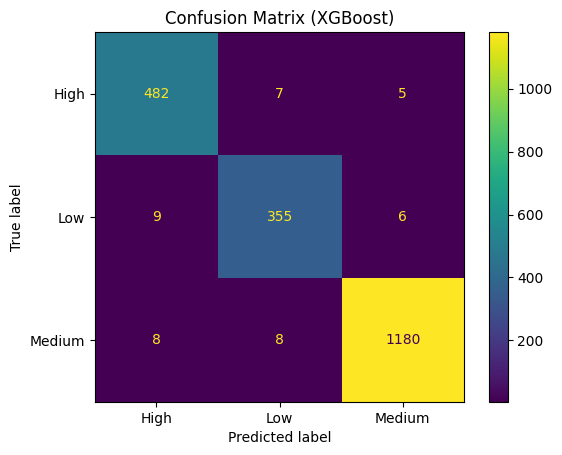

In [39]:
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')
plt.title(f"Confusion Matrix ({best_model_name})")
plt.show()


In [40]:
# 🔹 Classification report
print(f"\n📄 Classification Report ({best_model_name}):\n")
print(classification_report(y_test_labels, y_pred_labels, target_names=class_names))


📄 Classification Report (XGBoost):

              precision    recall  f1-score   support

        High       0.97      0.98      0.97       494
         Low       0.96      0.96      0.96       370
      Medium       0.99      0.99      0.99      1196

    accuracy                           0.98      2060
   macro avg       0.97      0.97      0.97      2060
weighted avg       0.98      0.98      0.98      2060



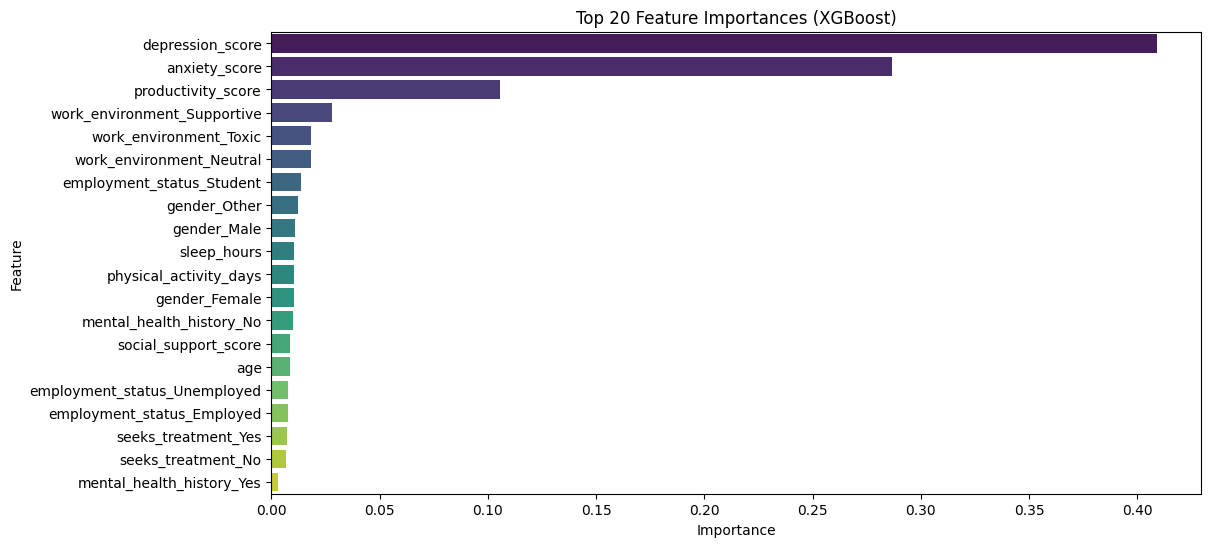

In [41]:
# 🔹 Feature Importance (if supported)
if best_model_name in ['RandomForest', 'XGBoost', 'LightGBM']:
    # extract feature names after preprocessing
    preprocessor.fit(X_train)
    feature_names_num = num_features
    feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
    feature_names = np.concatenate([feature_names_num, feature_names_cat])
    
    importances = best_pipe.named_steps['clf'].feature_importances_
    fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12,6))
    sns.barplot(x='Importance', y='Feature', data=fi_df.head(20), palette='viridis')
    plt.title(f"Top 20 Feature Importances ({best_model_name})")
    plt.show()

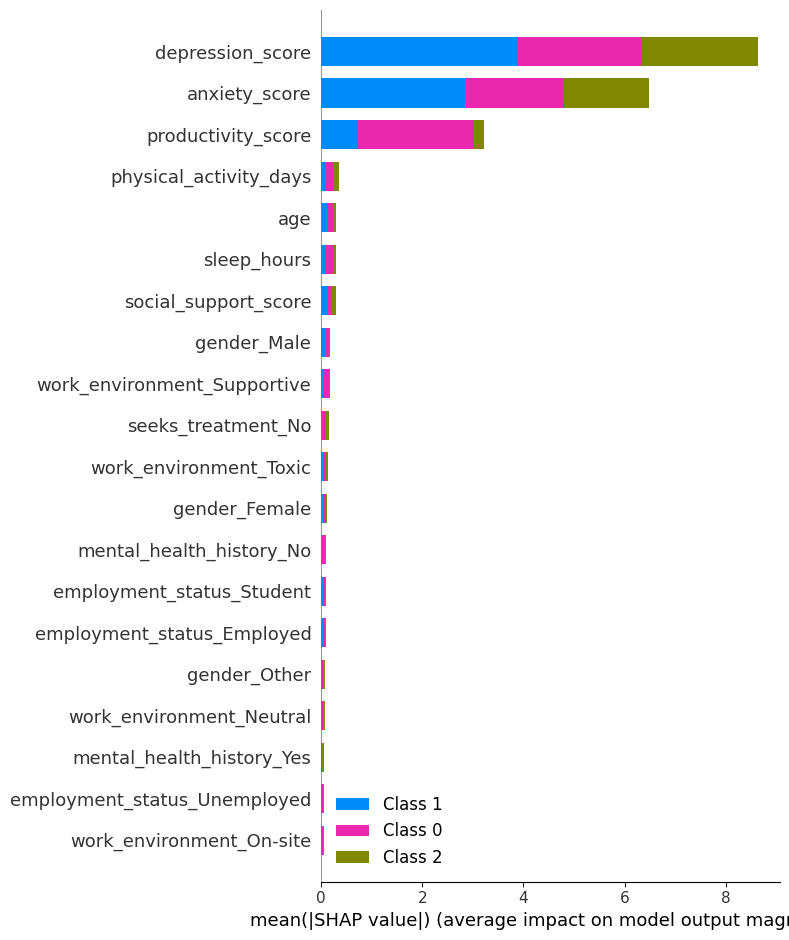

In [42]:
try:
    if best_model_name in ['RandomForest', 'XGBoost', 'LightGBM']:
        explainer = shap.Explainer(best_pipe.named_steps['clf'])
        X_test_transformed = best_pipe.named_steps['preproc'].transform(X_test)
        shap_values = explainer(X_test_transformed)
        shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)
except Exception as e:
    print("SHAP could not be computed:", e)


In [43]:
# 🔹 Save the best pipeline
joblib.dump(best_pipe, f"best_pipeline_{best_model_name}.pkl")
print(f"\n✅ Best pipeline saved as 'best_pipeline_{best_model_name}.pkl'")


✅ Best pipeline saved as 'best_pipeline_XGBoost.pkl'


In [45]:
# Example new sample
sample = X_test.iloc[[0]]  # pick first row
pred = best_pipe.predict(sample)
print("Predicted mental_health_risk:", le.inverse_transform(pred)[0])
print("Actual:", y_test_labels[0])


Predicted mental_health_risk: High
Actual: High


In [46]:
proba = best_pipe.predict_proba(sample)
print("Prediction probabilities:", proba)


Prediction probabilities: [[9.9999928e-01 2.5407756e-08 7.1993924e-07]]


✅ Test Accuracy: 0.9791

📄 Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.98      0.97       494
         Low       0.96      0.96      0.96       370
      Medium       0.99      0.99      0.99      1196

    accuracy                           0.98      2060
   macro avg       0.97      0.97      0.97      2060
weighted avg       0.98      0.98      0.98      2060



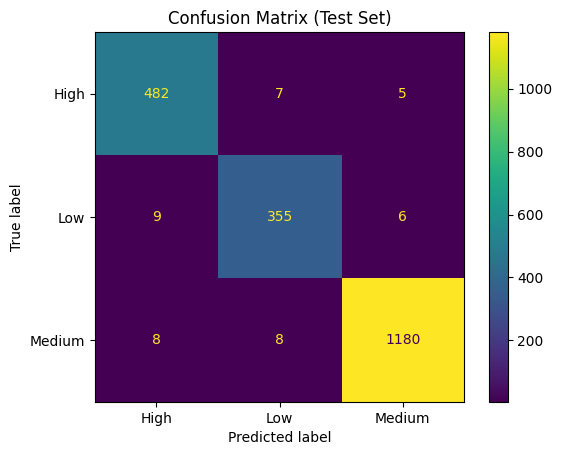

Sample 1:
  Predicted mental_health_risk: High
  Actual: High


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [47]:
# 🔹 Model evaluation block (API ছাড়াই)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# 1️⃣ Predict on test set
y_pred = best_pipe.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test_enc)

# 2️⃣ Accuracy
acc = accuracy_score(y_test_labels, y_pred_labels)
print(f"✅ Test Accuracy: {acc:.4f}\n")

# 3️⃣ Classification Report
print("📄 Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# 4️⃣ Confusion Matrix
class_names = le.classes_
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# 5️⃣ Single sample prediction test (first 3 samples)
for i in range(3):
    sample = X_test.iloc[[i]]
    pred = best_pipe.predict(sample)
    pred_label = le.inverse_transform(pred)[0]
    prob = best_pipe.predict_proba(sample) if hasattr(best_pipe, "predict_proba") else "N/A"
    print(f"Sample {i+1}:")
    print(f"  Predicted mental_health_risk: {pred_label}")
    print(f"  Actual: {y_test_labels[i]}")
    if prob != "N/A":
        print(f"  Prediction probabilities: {prob}")
    print("-"*40)


In [48]:
import pandas as pd

# Example: manually input a new student
new_input = pd.DataFrame({
    'age': [22],
    'gender': ['Male'],
    'employment_status': ['Student'],
    'work_environment': ['Online'],
    'mental_health_history': ['No'],
    'seeks_treatment': ['No'],
    'sleep_hours': [6],
    'physical_activity_days': [2],
    'depression_score': [10],
    'anxiety_score': [12],
    'social_support_score': [5],
    'productivity_score': [7]
})


In [49]:
# Predict the mental_health_risk
pred = best_pipe.predict(new_input)
pred_label = le.inverse_transform(pred)[0]

# Predict probability (optional)
prob = best_pipe.predict_proba(new_input) if hasattr(best_pipe, "predict_proba") else "N/A"

print("Predicted mental_health_risk:", pred_label)
print("Prediction probabilities:", prob)


Predicted mental_health_risk: Medium
Prediction probabilities: [[0.00287133 0.00110449 0.99602413]]


In [52]:
# Multiple rows
new_inputs = pd.DataFrame([
    {'age':22, 'gender':'Male', 'employment_status':'Student', 'work_environment':'Online',
     'mental_health_history':'No','seeks_treatment':'No','sleep_hours':6,'physical_activity_days':2,
     'depression_score':10,'anxiety_score':12,'social_support_score':5,'productivity_score':7},
    {'age':25, 'gender':'Female', 'employment_status':'Employed', 'work_environment':'Offline',
     'mental_health_history':'Yes','seeks_treatment':'Yes','sleep_hours':5,'physical_activity_days':0,
     'depression_score':20,'anxiety_score':18,'social_support_score':2,'productivity_score':4}
])

preds = best_pipe.predict(new_inputs)
pred_labels = le.inverse_transform(preds)
print(pred_labels)


['Medium' 'High']


In [56]:
new_input = pd.DataFrame({
    'age': [22],
    'gender': ['Male'],
    'employment_status': ['Student'],
    'work_environment': ['Online'],
    'mental_health_history': ['No'],
    'seeks_treatment': ['No'],
    'sleep_hours': [6],
    'physical_activity_days': [2],
    'depression_score': [10],
    'anxiety_score': [2],
    'social_support_score': [5],
    'productivity_score': [7]
})
# 2️⃣ Predict label
pred_numeric = best_pipe.predict(new_input)
pred_label = le.inverse_transform(pred_numeric)[0]

# 3️⃣ Predict probability (if supported)
if hasattr(best_pipe, "predict_proba"):
    prob = best_pipe.predict_proba(new_input)[0]
    print("Prediction probabilities:")
    for cls, p in zip(le.classes_, prob):
        print(f"  {cls}: {p:.4f}")
else:
    prob = None

print(f"\nPredicted mental_health_risk: {pred_label}")

Prediction probabilities:
  High: 0.0694
  Low: 0.8894
  Medium: 0.0412

Predicted mental_health_risk: Low


In [57]:
# 🔹 Interactive Prediction Widget with Probability Bar Chart
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Input widgets
age_widget = widgets.IntText(value=22, description='Age:')
gender_widget = widgets.Dropdown(options=['Male','Female'], description='Gender:')
employment_widget = widgets.Dropdown(options=['Student','Employed','Unemployed'], description='Employment:')
work_env_widget = widgets.Dropdown(options=['Online','Offline','Hybrid'], description='Work Env:')
mental_hist_widget = widgets.Dropdown(options=['Yes','No'], description='Mental Hist:')
treatment_widget = widgets.Dropdown(options=['Yes','No'], description='Seeks Treatment:')
sleep_widget = widgets.IntText(value=6, description='Sleep hrs:')
activity_widget = widgets.IntText(value=2, description='Physical Activity Days:')
depression_widget = widgets.IntText(value=10, description='Depression Score:')
anxiety_widget = widgets.IntText(value=12, description='Anxiety Score:')
support_widget = widgets.IntText(value=5, description='Social Support Score:')
productivity_widget = widgets.IntText(value=7, description='Productivity Score:')

# 2️⃣ Prediction button
predict_button = widgets.Button(description='Predict Risk', button_style='success')
output = widgets.Output()

# 3️⃣ Prediction function
def predict_risk(b):
    with output:
        clear_output()
        # Collect input
        input_df = pd.DataFrame({
            'age':[age_widget.value],
            'gender':[gender_widget.value],
            'employment_status':[employment_widget.value],
            'work_environment':[work_env_widget.value],
            'mental_health_history':[mental_hist_widget.value],
            'seeks_treatment':[treatment_widget.value],
            'sleep_hours':[sleep_widget.value],
            'physical_activity_days':[activity_widget.value],
            'depression_score':[depression_widget.value],
            'anxiety_score':[anxiety_widget.value],
            'social_support_score':[support_widget.value],
            'productivity_score':[productivity_widget.value]
        })
        
        # Predict label
        pred_numeric = best_pipe.predict(input_df)
        pred_label = le.inverse_transform(pred_numeric)[0]
        
        # Predict probability
        if hasattr(best_pipe, "predict_proba"):
            prob = best_pipe.predict_proba(input_df)[0]
            # Display probabilities
            print("Prediction probabilities:")
            for cls, p in zip(le.classes_, prob):
                print(f"  {cls}: {p:.4f}")
            
            # Bar chart
            plt.figure(figsize=(6,4))
            sns.barplot(x=list(le.classes_), y=prob, palette='viridis')
            plt.ylabel("Probability")
            plt.title(f"Predicted mental_health_risk: {pred_label}")
            plt.ylim(0,1)
            plt.show()
        else:
            prob = None
        print(f"\n✅ Predicted mental_health_risk: {pred_label}")

# 4️⃣ Connect button
predict_button.on_click(predict_risk)

# 5️⃣ Display all widgets
input_widgets = widgets.VBox([
    age_widget, gender_widget, employment_widget, work_env_widget,
    mental_hist_widget, treatment_widget, sleep_widget, activity_widget,
    depression_widget, anxiety_widget, support_widget, productivity_widget,
    predict_button, output
])

display(input_widgets)


In [58]:
# 🔹 Score-only Interactive Prediction Widget
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Define score input widgets (example scores)
gad7_widget = widgets.IntText(value=10, description='GAD-7 Score:')
pss11_widget = widgets.IntText(value=12, description='PSS-11 Score:')
depression_widget = widgets.IntText(value=10, description='Depression Score:')
anxiety_widget = widgets.IntText(value=12, description='Anxiety Score:')
social_support_widget = widgets.IntText(value=5, description='Social Support Score:')
productivity_widget = widgets.IntText(value=7, description='Productivity Score:')

# 2️⃣ Button for prediction
predict_button = widgets.Button(description='Predict Risk', button_style='success')
output = widgets.Output()

# 3️⃣ Function to handle prediction
def predict_risk_score_only(b):
    with output:
        clear_output()
        
        # Build input dataframe (default values for non-score features)
        input_df = pd.DataFrame({
            'age':[22],  # default age
            'gender':['Male'],  # default
            'employment_status':['Student'],  # default
            'work_environment':['Online'],  # default
            'mental_health_history':['No'],  # default
            'seeks_treatment':['No'],  # default
            'sleep_hours':[6],  # default
            'physical_activity_days':[2],  # default
            'depression_score':[depression_widget.value],
            'anxiety_score':[anxiety_widget.value],
            'social_support_score':[social_support_widget.value],
            'productivity_score':[productivity_widget.value]
        })
        
        # Predict
        pred_numeric = best_pipe.predict(input_df)
        pred_label = le.inverse_transform(pred_numeric)[0]
        
        # Probability
        if hasattr(best_pipe, "predict_proba"):
            prob = best_pipe.predict_proba(input_df)[0]
            print("Prediction probabilities:")
            for cls, p in zip(le.classes_, prob):
                print(f"  {cls}: {p:.4f}")
            
            # Bar chart
            plt.figure(figsize=(6,4))
            sns.barplot(x=list(le.classes_), y=prob, palette='viridis')
            plt.ylabel("Probability")
            plt.title(f"Predicted mental_health_risk: {pred_label}")
            plt.ylim(0,1)
            plt.show()
        
        print(f"\n✅ Predicted mental_health_risk: {pred_label}")

# 4️⃣ Connect button
predict_button.on_click(predict_risk_score_only)

# 5️⃣ Display widgets
input_widgets = widgets.VBox([
    gad7_widget, pss11_widget, depression_widget, anxiety_widget,
    social_support_widget, productivity_widget, predict_button, output
])

display(input_widgets)
